# Titanic-Survival-Prediction-Using-ML-Pipelines

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load Dataset

df = pd.read_csv(r'Dataset\titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# describe dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [6]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

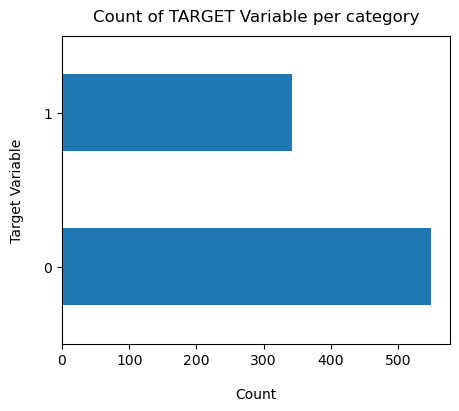

In [7]:
df['Survived'].value_counts().plot(kind='barh', figsize=(5, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [8]:
# check percentage of Survived

round(100*df['Survived'].value_counts()/len(df['Survived']), 2)

Survived
0    61.62
1    38.38
Name: count, dtype: float64

### `Data is Imbalanced`

#### `We will balance this data using OverSampling Techinque i.e SMOTE`

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

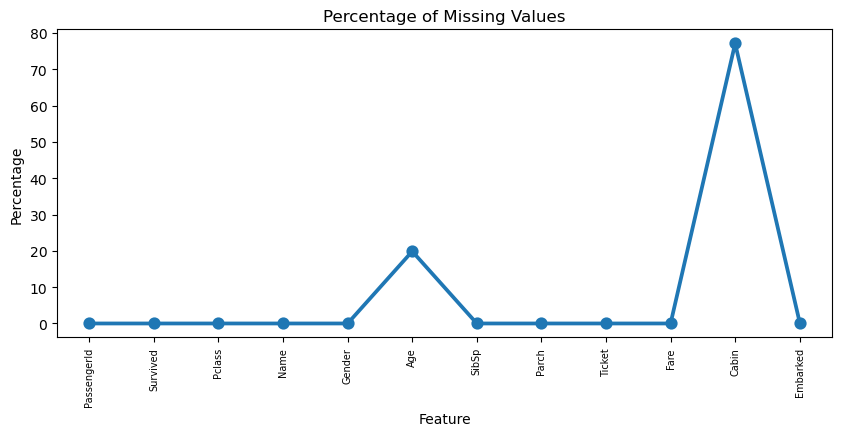

In [10]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['Feature', 'Missing Percentage']  # Rename columns for clarity

plt.figure(figsize=(10,4))
ax = sns.pointplot(x='Feature', y='Missing Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()


### `As you can see above Age and Cabin columns values are missing`

In [11]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [12]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
x = df.drop('Survived', axis=1)
y = df.Survived

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline # from imblearn for SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Select columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
cat_cols = ['Pclass', 'Gender', 'Embarked']

# Preprocessing for numerical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

# Function to train models with the pipeline
def train_model_with_pipeline(model, model_name):
    pipeline = ImbPipeline(steps=[
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    # Parameters for Hyper Parameter Tuning
    param_grid = {
        'Logistic Regression': {
            'classifier__C': [0.01, 0.1, 1, 10]
        },
        'KNN': {
            'classifier__n_neighbors': [3, 5, 7]
        },
        'Decision Tree': {
            'classifier__max_depth': [1,2,3,4,5,6,7],
            'classifier__criterion': ['gini','entropy','log_loss'],
            'classifier__max_features': ['auto','sqrt','log2'],
            'classifier__splitter': ['best','random']
        },
          'Random Forest': {
              'classifier__n_estimators': [100, 200, 300],
              'classifier__criterion': ['gini', 'entropy'],
              'classifier__max_depth': [5, 10, 15, None],
              'classifier__min_samples_split': np.arange(2, 10),
              'classifier__min_samples_leaf': np.arange(1, 10)    
          },
        'AdaBoost': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.5, 1.0]
        },
        'GradientBoosting': {
            'classifier__n_estimators': [100, 150],
            'classifier__learning_rate': [0.05, 0.1]
        },
        'xgboost': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5, 7],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__subsample': [0.8, 1.0],
            'classifier__colsample_bytree': [0.8, 1.0]
        }
    }

    # Train the model
    if model_name in param_grid:
        grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"\nBest parameters for {model_name}:", grid_search.best_params_)
        preds = best_model.predict(x_test)
    else:
        pipeline.fit(x_train, y_train)
        preds = pipeline.predict(x_test)

    # Print classification report for model evaluation
    print(f"\n=== {model_name} Report ===")
    print(classification_report(y_test, preds))
    print('-'*80)
    print()

# Train and evaluate models using the pipeline
train_model_with_pipeline(LogisticRegression(), "Logistic Regression")
train_model_with_pipeline(KNeighborsClassifier(), "KNN")
train_model_with_pipeline(DecisionTreeClassifier(), "Decision Tree")
train_model_with_pipeline(RandomForestClassifier(), "Random Forest")
train_model_with_pipeline(AdaBoostClassifier(), "AdaBoost")
train_model_with_pipeline(GradientBoostingClassifier(), "GradientBoosting")
train_model_with_pipeline(XGBClassifier(random_state=42), "xgboost")


Best parameters for Logistic Regression: {'classifier__C': 1}

=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179

--------------------------------------------------------------------------------


Best parameters for KNN: {'classifier__n_neighbors': 5}

=== KNN Report ===
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       110
           1       0.71      0.80      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179

--------------------------------------------------------------------------------


Best 